Epoch:     0, Train acc: 0.18666666666666668, Test acc: 0.1621
Epoch:     1, Train acc: 0.20333333333333334, Test acc: 0.1731
Epoch:     2, Train acc: 0.21, Test acc: 0.1879
Epoch:     3, Train acc: 0.23, Test acc: 0.2043
Epoch:     4, Train acc: 0.27, Test acc: 0.2251
Epoch:     5, Train acc: 0.29333333333333333, Test acc: 0.2414
Epoch:     6, Train acc: 0.31, Test acc: 0.254
Epoch:     7, Train acc: 0.34, Test acc: 0.2724
Epoch:     8, Train acc: 0.3566666666666667, Test acc: 0.2894
Epoch:     9, Train acc: 0.3933333333333333, Test acc: 0.3104
Epoch:    10, Train acc: 0.42333333333333334, Test acc: 0.3295
Epoch:    11, Train acc: 0.44666666666666666, Test acc: 0.3449
Epoch:    12, Train acc: 0.51, Test acc: 0.37
Epoch:    13, Train acc: 0.5166666666666667, Test acc: 0.3933
Epoch:    14, Train acc: 0.5366666666666666, Test acc: 0.4073
Epoch:    15, Train acc: 0.5733333333333334, Test acc: 0.418
Epoch:    16, Train acc: 0.5833333333333334, Test acc: 0.4333
Epoch:    17, Train acc: 0.59

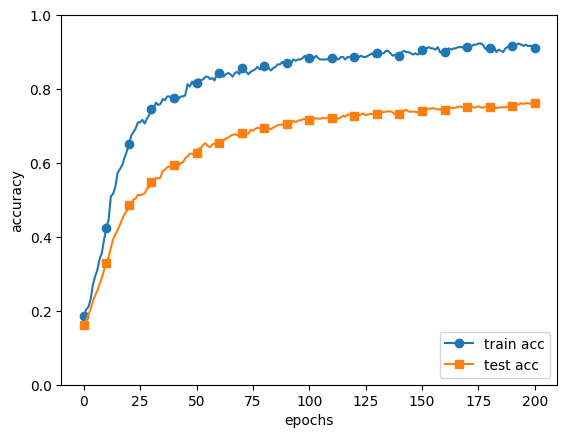

In [ ]:
import os, sys

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

sys.path.append(parent_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0.095

network = MultiLayerNet(
    input_size=784,
    hidden_size_list=[100, 100, 100],
    output_size=10,
    weight_decay_lambda=weight_decay_lambda,
)
optimizer = SGD(lr=0.01)

train_size = x_train.shape[0]

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        train_acc_list.append(train_acc)

        test_acc = network.accuracy(x_test, t_test)
        test_acc_list.append(test_acc)

        print(f"Epoch: {epoch_cnt:5d}, Train acc: {train_acc}, Test acc: {test_acc}")
        epoch_cnt += 1

    if epoch_cnt >= max_epochs:
        break

markers = {"train": "o", "test": "s"}
x = np.arange(max_epochs)

plt.plot(x, train_acc_list, label="train acc", marker="o", markevery=10)
plt.plot(x, test_acc_list, label="test acc", marker="s", markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()